In [1]:
from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


## Model-Free

In [2]:
def test3(m, title_name='model-free', n=50):
    
    m.run_experiment(n) 
    
    # production trace
    df1 = m.df_actr_production_traces(parameter_name=':utility')
    df1['index_bin'] = pd.cut(df1['index'], 10, labels=False, ordered=False, right=False)

    # memory trace
    try: 
        df2 = m.df_actr_chunk_traces(parameter_name=':Last-Retrieval-Activation')
        df2['index_bin'] = pd.cut(df2['index'], 10, labels=False)  
        df2.replace(to_replace=[None], value=np.nan, inplace=True)
        #selected_memory = df2.groupby('memory')[':Last-Retrieval-Activation'].mean().sort_values(ascending = False).index[:4].values
        selected_memory = ['M1-1', 'M1-2']
        df2 = df2[df2.apply(lambda x: x['memory'] in selected_memory, axis=1)]
    except:
        print('no memory trace')
        df2 = None
    finally:
        return df1, df2 

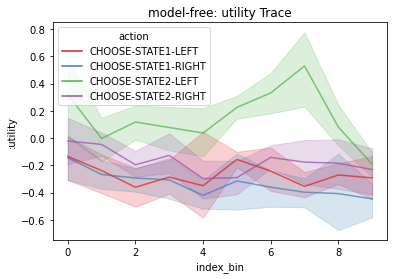

In [ ]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model1', verbose=False)

df1, df2 = test3(m, 'model-free')

ax = sns.lineplot(data = df1, x='index_bin', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

## Model-Base

In [4]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model2', verbose=False)

df1, df2 = test3(m, 'model-base')

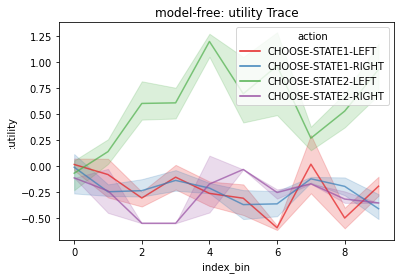

In [5]:
ax = sns.lineplot(data = df1, x='index_bin', y=':utility', hue='action', alpha=.7, palette='Set1')
plt.title('model-free: utility Trace')
plt.show()

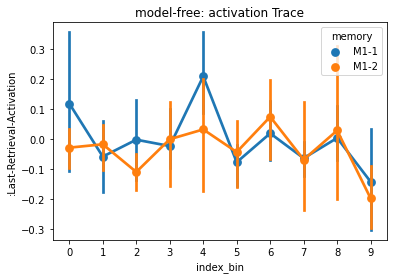

In [6]:
sns.pointplot(data = df2, x='index_bin', y=':Last-Retrieval-Activation', hue='memory', alpha=.5)
plt.title('model-free: activation Trace')
plt.show()